# Week 2: R Basics

POP77001 Computer Programming for Social Scientists

Tom Paskhalis

## Overview

-   Backstory
-   R operators and objects
-   Data structures and types
-   Indexing and subsetting
-   Attributes

# Introduction to R

## R Background

<figure>
<img
src="https://www.stat.auckland.ac.nz/2008/ihaka-pickering/full/0029.jpg"
alt="University of Auckland" />
<figcaption aria-hidden="true"><a
href="https://www.auckland.ac.nz/en/science/about-the-faculty/department-of-statistics.html">University
of Auckland</a></figcaption>
</figure>

<figure>
<img src="https://www.r-project.org/logo/Rlogo.png"
alt="The R Project for Statistical Computing" />
<figcaption aria-hidden="true"><a href="https://www.r-project.org/">The
R Project for Statistical Computing</a></figcaption>
</figure>

-   *S* (for **s**tatistics) is a programming language for statistical
    analysis developed in 1976 in AT&T Bell Labs.
-   Original S language and its extension S-PLUS were closed source.
-   In 1991 **R**oss Ihaka and **R**obert Gentleman began developing R,
    an open-source alternative to S.

## R Overview

-   R is an *interpreted* language (like Python and Stata).
-   It is geared towards statistical analysis.
-   R is often used for interactive data analysis (one command at a
    time).
-   But it also permits to execute entire scripts in *batch* mode.

. . .

In [ ]:
# Generate 5 random numbers from a standard normal distribution 
rnorm(5)

[1]  0.25475680 -0.90467798 -0.57420992  0.04561303 -0.03094738

# Operations

## Operators

Key **operators** (**infix** functions) in R are:

-   Assignment (`<-`, `<<-`, `=`)
-   Arithmetic (`+`, `-`, `*`, `^`, `/`, `%/%`, `%%`, `%*%`)
-   Boolean (`&`, `&&`, `|`, `||`, `!`)
-   Relational (`==`, `!=`, `>`, `>=`, `<`, `<=`)
-   Membership (`%in%`)

## Mathematical Operations

Arithmetic operations in R:

In [ ]:
1 + 1

[1] 2

. . .

In [ ]:
5 - 3

[1] 2

. . .

In [ ]:
6 / 2

[1] 3

. . .

In [ ]:
4 * 4

[1] 16

. . .

In [ ]:
## Exponentiation, note that 2 ** 4 also works, but is not recommended
2 ^ 4

[1] 16

. . .

Advanced mathematical operations:

. . .

In [ ]:
# Integer division
7 %/% 3

[1] 2

. . .

In [ ]:
# Modulo operation (remainder of division)
7 %% 3

[1] 1

## Logical Operations

In [ ]:
3 != 1 # Not equal

[1] TRUE

. . .

In [ ]:
3 > 3 # Greater than

[1] FALSE

. . .

In [ ]:
# OR - TRUE if either first or second operand is TRUE, FALSE otherwise
FALSE | TRUE

[1] TRUE

. . .

In [ ]:
# R also treats F and T as Boolean, but
# it is not recommended due to poor legibility
F | T

[1] TRUE

. . .

In [ ]:
# Longer form '&&' (AND) and '||' (OR) evaluate
# to a single value and are preferable in programming control flow
FALSE && TRUE

[1] FALSE

. . .

In [ ]:
# Shorter form '|' ('&') performs element-wise comparison
# and is often used in vectorised operations
c(FALSE, TRUE) | c(FALSE, FALSE) 

[1] FALSE  TRUE

. . .

In [ ]:
# It is the only form appropriate for vector comparison
# (starting from R version 4.3.0)
c(FALSE, TRUE) || c(FALSE, FALSE) 

## Operator Precedence

| Operator            | Description                              |
|:--------------------|:-----------------------------------------|
| :: :::              | access variables in a namespace          |
| \$ @                | component / slot extraction              |
| \[ \[\[             | indexing                                 |
| ^                   | exponentiation (right to left)           |
| \- +                | unary minus and plus                     |
| :                   | sequence operator                        |
| %any% \|\>          | special operators (including %% and %/%) |
| \* /                | multiply, divide                         |
| \+ -                | (binary) add, subtract                   |
| \< \> \<= \>= == != | ordering and comparison                  |
| !                   | negation                                 |
| & &&                | and                                      |
| \| \|\|             | or                                       |
| ~                   | as in formulae                           |
| -\> -\>\>           | rightwards assignment                    |
| \<- \<\<-           | assignment (right to left)               |
| =                   | assignment (right to left)               |
| ?                   | help (unary and binary)                  |

> **Extra**
>
> [R Documentation on Operator Syntax and
> Precedence](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Syntax.html)

## Operator Precedence: Examples

In [ ]:
# Effectively, 5 > (3 * 2)
5 > 3 * 2

[1] FALSE

. . .

In [ ]:
(5 > 3) * 2

[1] 2

. . .

In [ ]:
# Effectively, 3 + (2 ^ 1)/2
3 + 2 ^ 1/2

[1] 4

. . .

In [ ]:
3 + 2 ^ (1/2)

[1] 4.414214

# Assignment

## R Objects

> Everything that exists in R is an object.
>
> John Chambers

. . .

-   Fundamentally, everything you are dealing with in R is an
    **object**.
-   That includes individual variables, datasets, functions and many
    other classes of objects.
-   The key reference to an object is its **name**.
-   Typically, the reference is established through assignment
    operation.

## Assignment Operation

-   **Assignment** is the most important operation in R.
-   It is used to *bind* an object to a name.
-   `<-` is the standard assignment operator in R.
-   While `=` is also supported, it is not recommended.

``` r
x <- 3
```

  

``` r
x
```

    [1] 3

> **Extra**
>
> [R Documentation on
> Assignment](https://stat.ethz.ch/R-manual/R-devel/library/base/html/assignOps.html)

## Objects and Names

In [ ]:
x <- 3

. . .

-   The way to read this is
    -   “create an object (numeric vector of length 1) with element 3
        and bind it to the name `x`”.
-   Thus, assignment operation does 2 things:
    -   Creates an object.
    -   Binds it to a name.

. . .

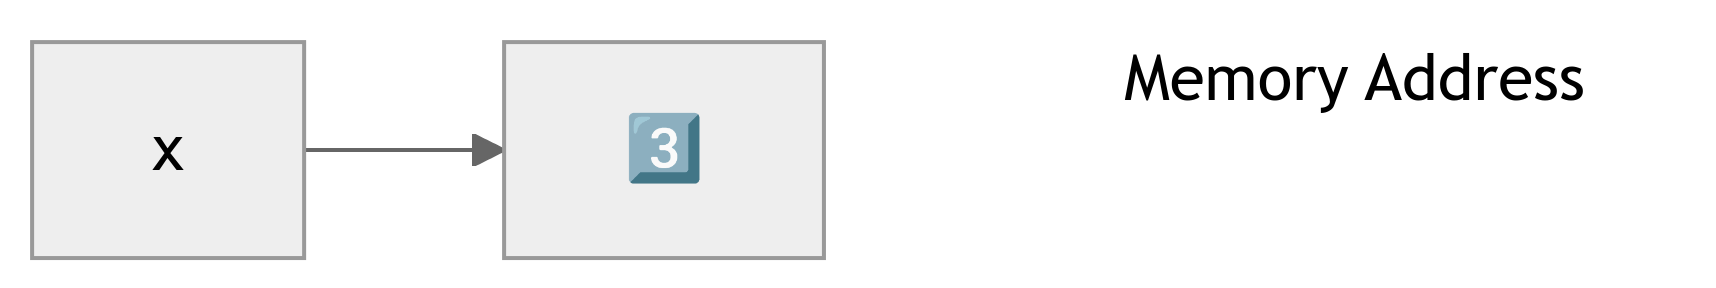

## Aliases

-   Creating (binding) another name (**alias**) to an object does not
    create a copy of the object.

In [ ]:
# We can use tracemem() function to trace the memory address of an object
tracemem(x)

[1] "<0x62933b6ac848>"

. . .

In [ ]:
y <- x

. . .

In [ ]:
tracemem(y)

[1] "<0x62933b6ac848>"

. . .

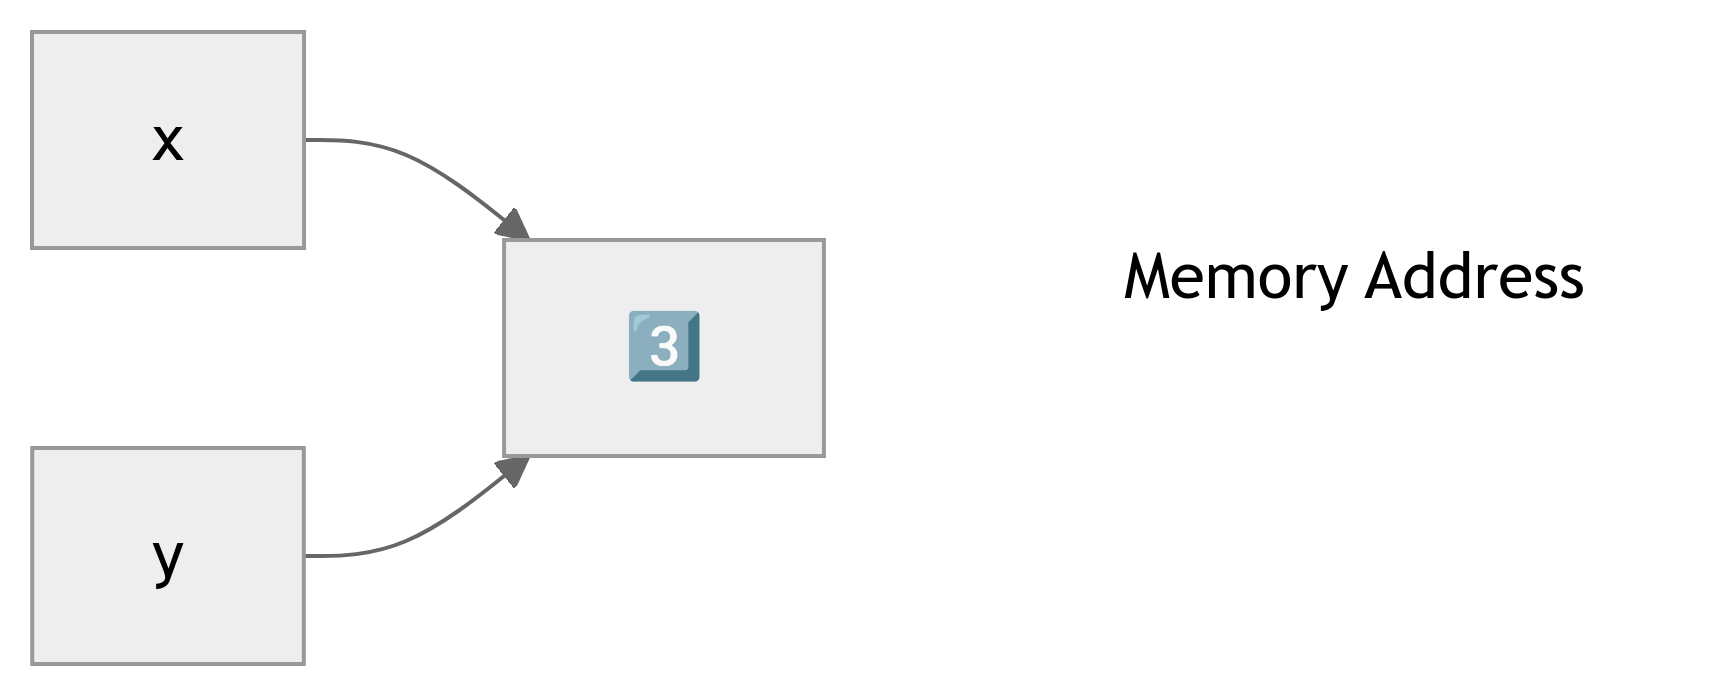

## Copies

-   R will create a copy of an object if the original object is
    modified.
-   This is also known as **copy-on-modify** semantics.
-   While it might seem innocuous, it can have implications for large
    objects.

In [ ]:
x <- 5

. . .

In [ ]:
# Pointing to the original object
tracemem(y)

[1] "<0x62933b6ac848>"

. . .

In [ ]:
# Pointing to a new object
tracemem(x)

[1] "<0x6293372980a8>"

. . .

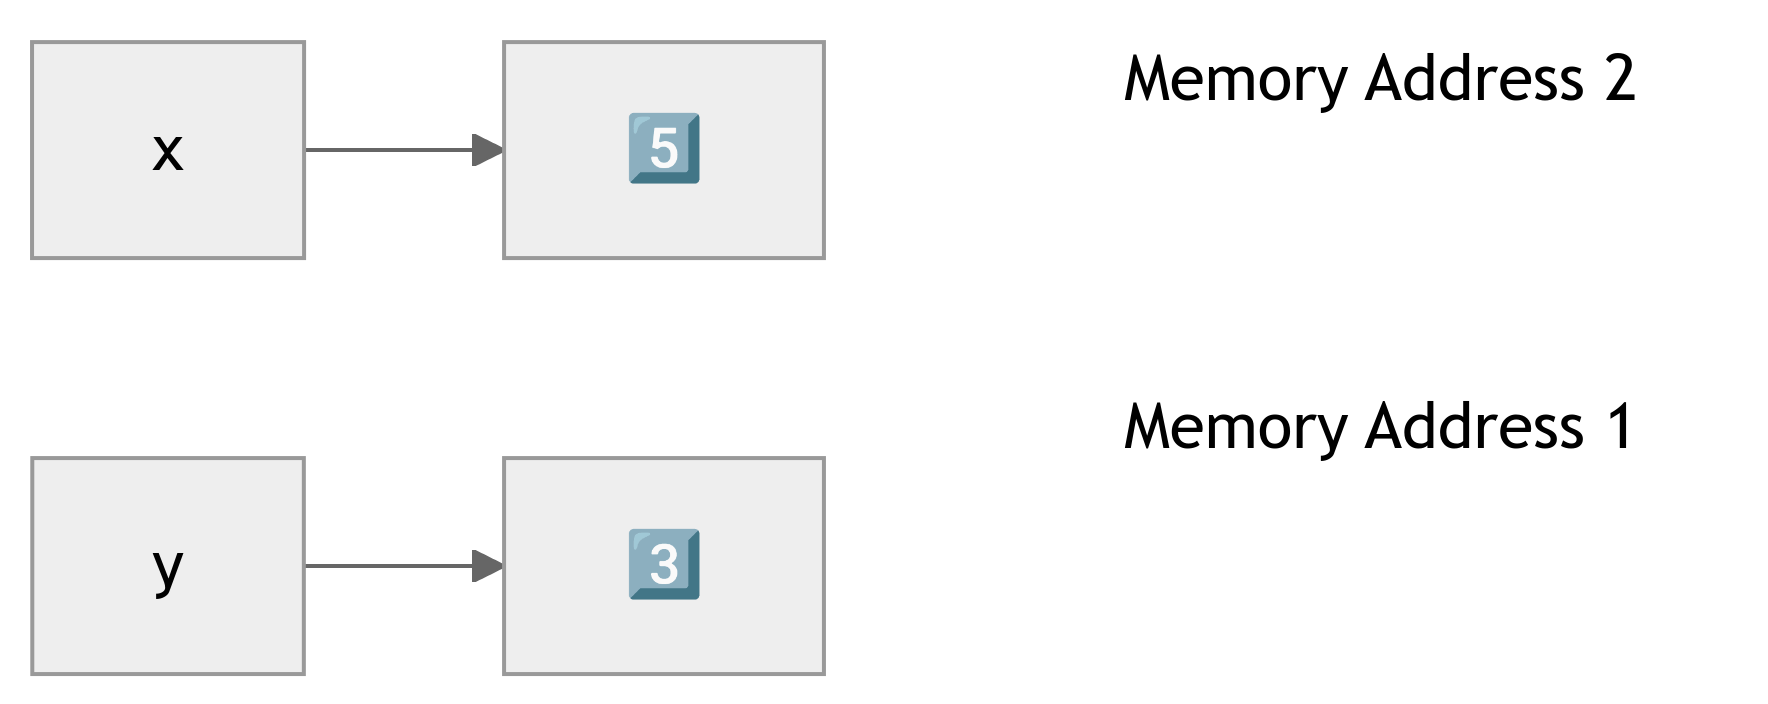

# Vector

## Dimensionality & Homogeneity

Base R data structures can be classified along their: -
**dimensionality** - **homogeneity**

5 main built-in data structures in R:

-   Atomic vector (`vector`)
-   Matrix (`matrix`)
-   Array (`array`)
-   List (`list`)
-   Data frame (`data.frame`)

## Data Structures in R

| Structure    | Description                      | Dimensionality | Data Type     |
|:------------|:------------------------------|:--------------|:-------------|
| `vector`     | Atomic vector (scalar)           | 1d             | homogenous    |
| `matrix`     | Matrix                           | 2d             | homogenous    |
| `array`      | One-, two or n-dimensional array | 1d/2d/nd       | homogenous    |
| `list`       | List                             | 1d             | heterogeneous |
| `data.frame` | Rectangular data                 | 2d             | heterogeneous |

## Vectors in R

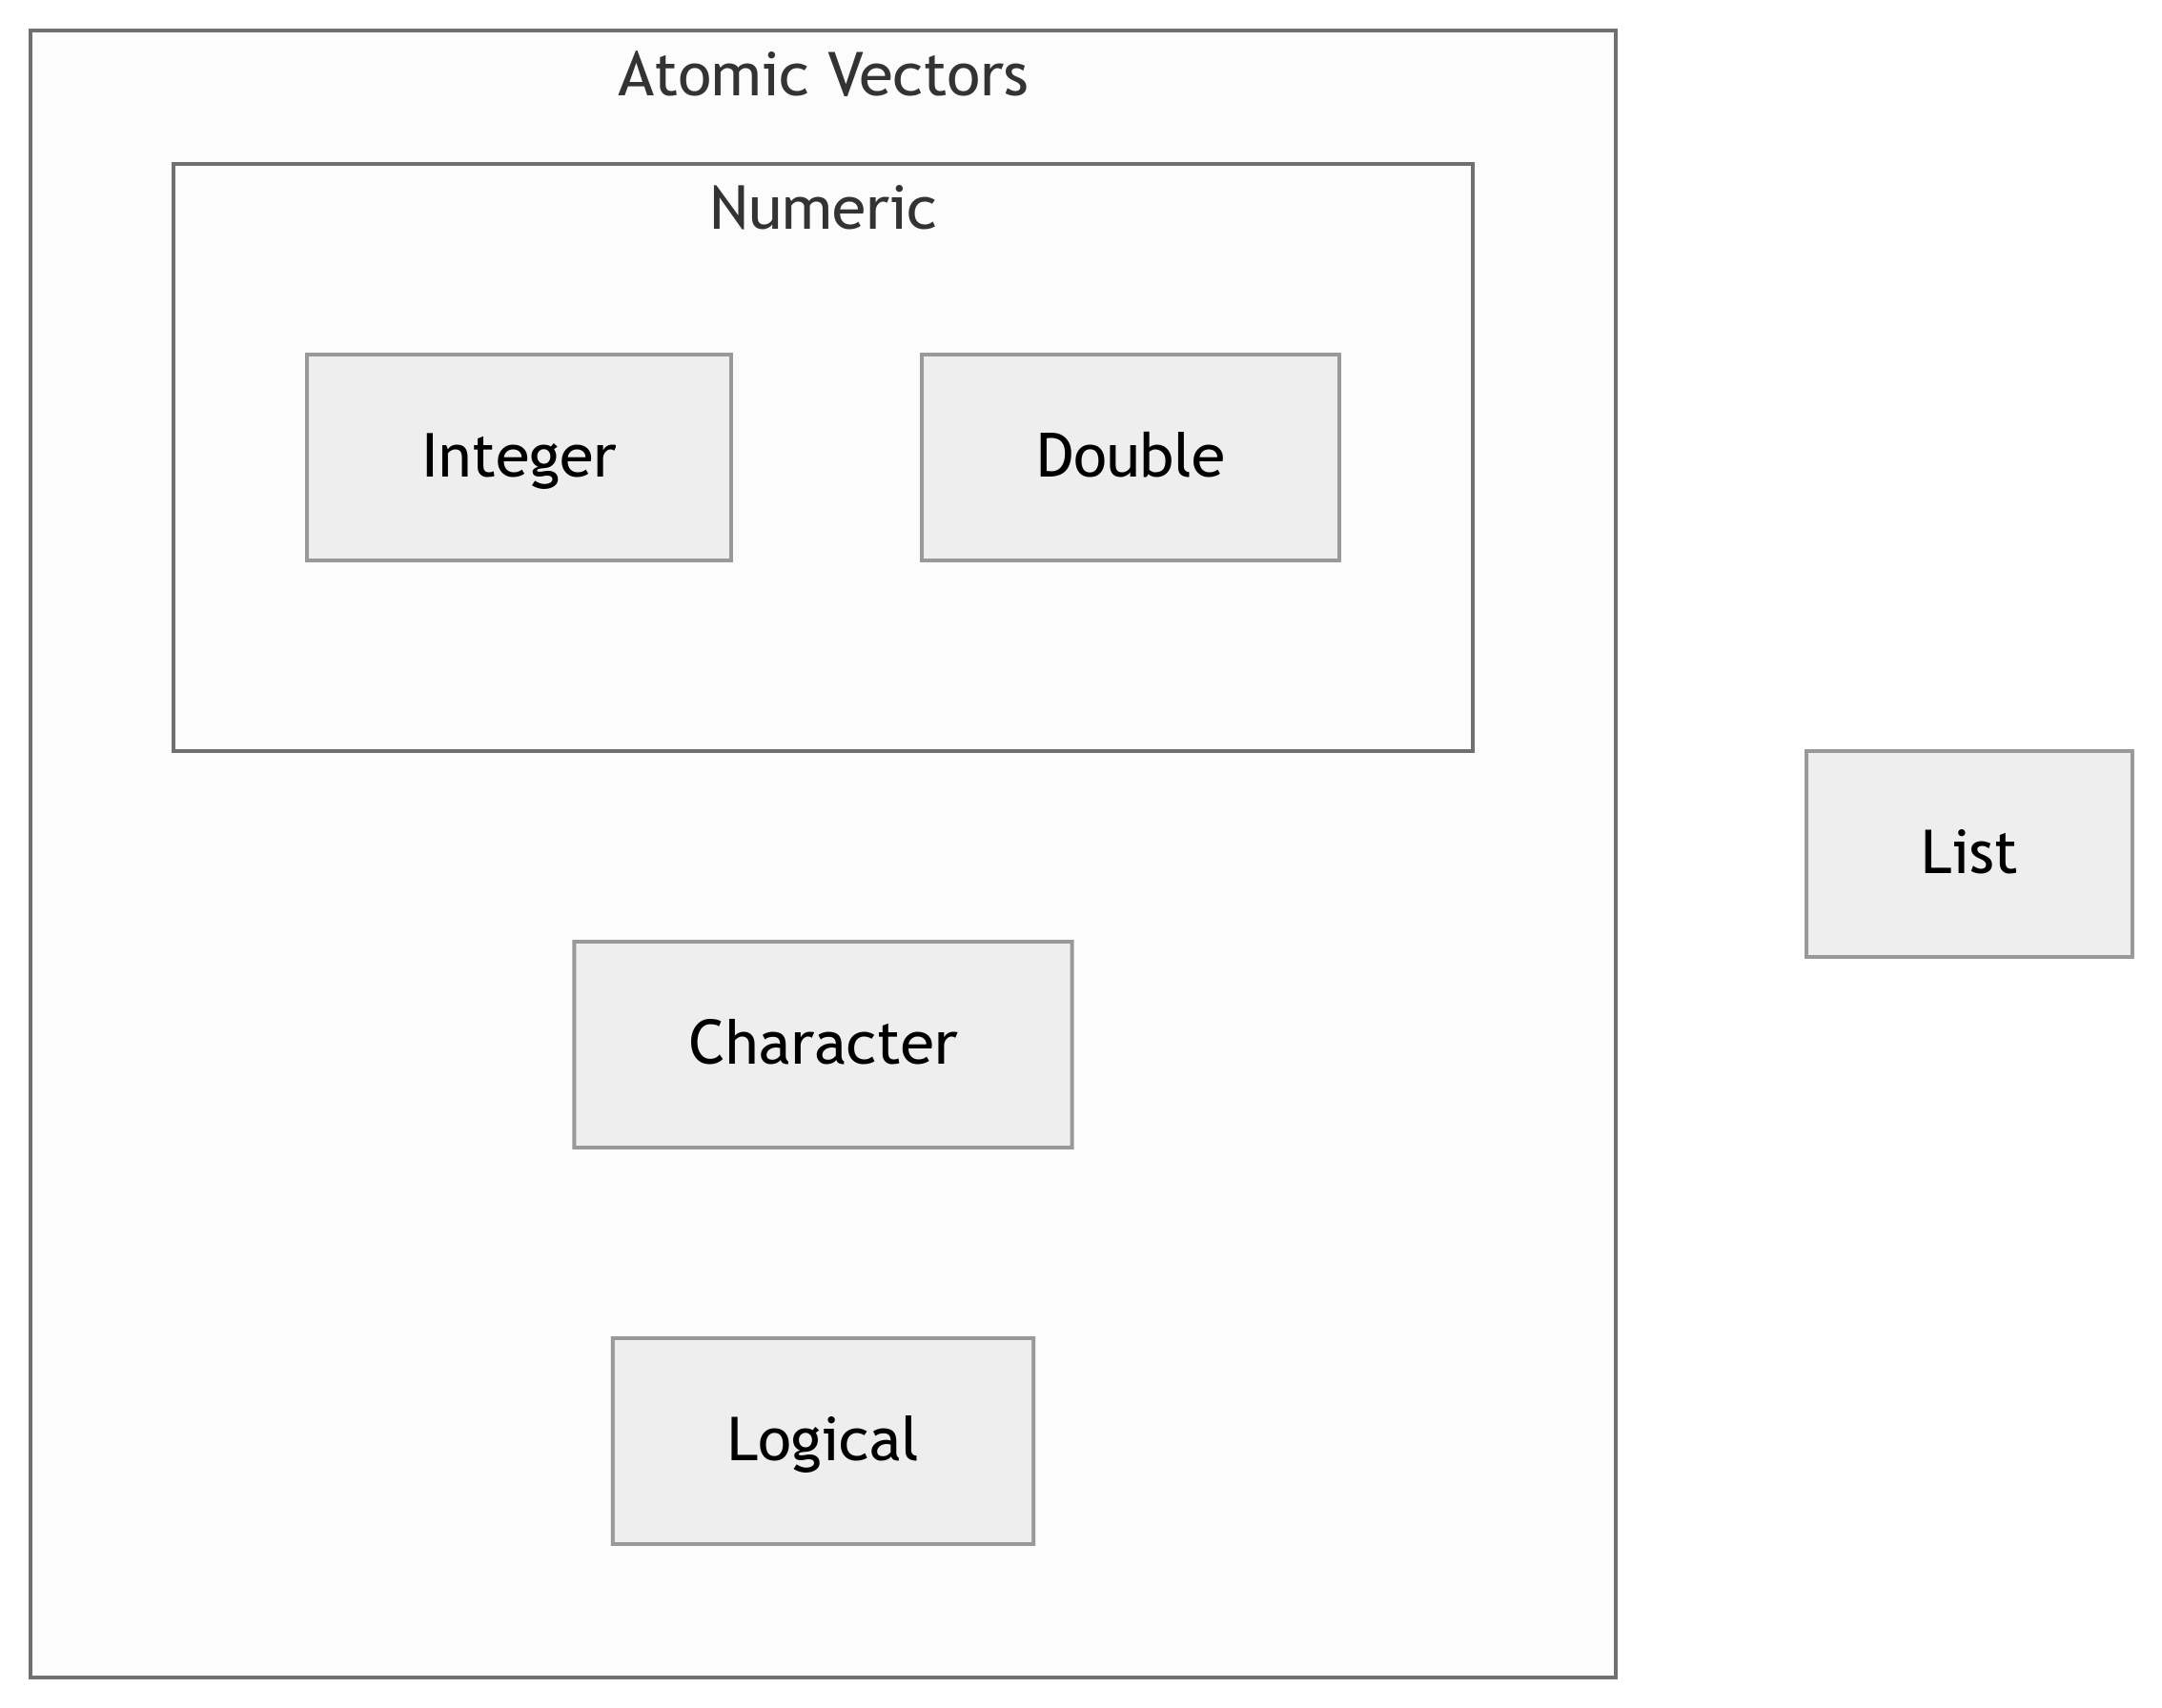

## Atomic Vectors

-   **Vector** is the core building block of R
-   Vectors can be created with `c()` function (short for **c**ombine)

. . .

In [ ]:
v <- c(1, 2, 3)
v

[1] 1 2 3

. . .

In [ ]:
v <- c(v, 4) # Vectors are always flattened (even when nested)
v

[1] 1 2 3 4

## Scalars

-   R has no scalars.
-   Single values are just vectors of length 1.

. . .

In [ ]:
1[1]

[1] 1

# Data Types

## Main Data Types

4 common data types that are contained in R structures:

-   Character (`character`)
-   Double (`double`, also `numeric`)
-   Integer (`integer`, also `numeric`)
-   Logical/boolean (`logical`)

## Character Vector

In [ ]:
char_vec <- c("apple", "banana", "watermelon")

. . .

In [ ]:
char_vec

[1] "apple"      "banana"     "watermelon"

. . .

In [ ]:
# length() function gives the length of an R object
length(char_vec) 

[1] 3

. . .

In [ ]:
# typeof() function returns the type of an R object
typeof(char_vec)

[1] "character"

. . .

In [ ]:
# is.character() tests whether R object (vector/array/matrix)
# contains elements of type 'character'
is.character(char_vec)

[1] TRUE

## Double Vector

In [ ]:
# Note that even without decimal part R treats these numbers as double
dbl_vec <- c(300, 200, 4)

. . .

In [ ]:
dbl_vec

[1] 300 200   4

. . .

In [ ]:
typeof(dbl_vec)

[1] "double"

. . .

In [ ]:
is.double(dbl_vec)

[1] TRUE

## Integer Vector

In [ ]:
# Note the 'L' suffix to make sure you get an integer rather than double
int_vec <- c(300L, 200L, 4L)

. . .

In [ ]:
int_vec

[1] 300 200   4

. . .

In [ ]:
typeof(int_vec)

[1] "integer"

. . .

In [ ]:
is.integer(int_vec)

[1] TRUE

. . .

In [ ]:
# Note that is.numeric() function is a generic way of testing
# whether vector contains numbers - either integers or double
is.numeric(int_vec)

[1] TRUE

. . .

In [ ]:
is.numeric(dbl_vec)

[1] TRUE

## Integer vs Double

-   Integers are used to store whole numbers (e.g. counts)
-   Unsigned 32-bit integer: $2^{32} - 1 = 4,294,967,295$
    -   Signed 32-bit integer:
        $[-2,147,483,648 \mathrel{{.}\,{.}} 2,147,483,647]$
-   Unsigned 64-bit integer: $2^{64} - 1 = 18,446,744,073,709,551,615$

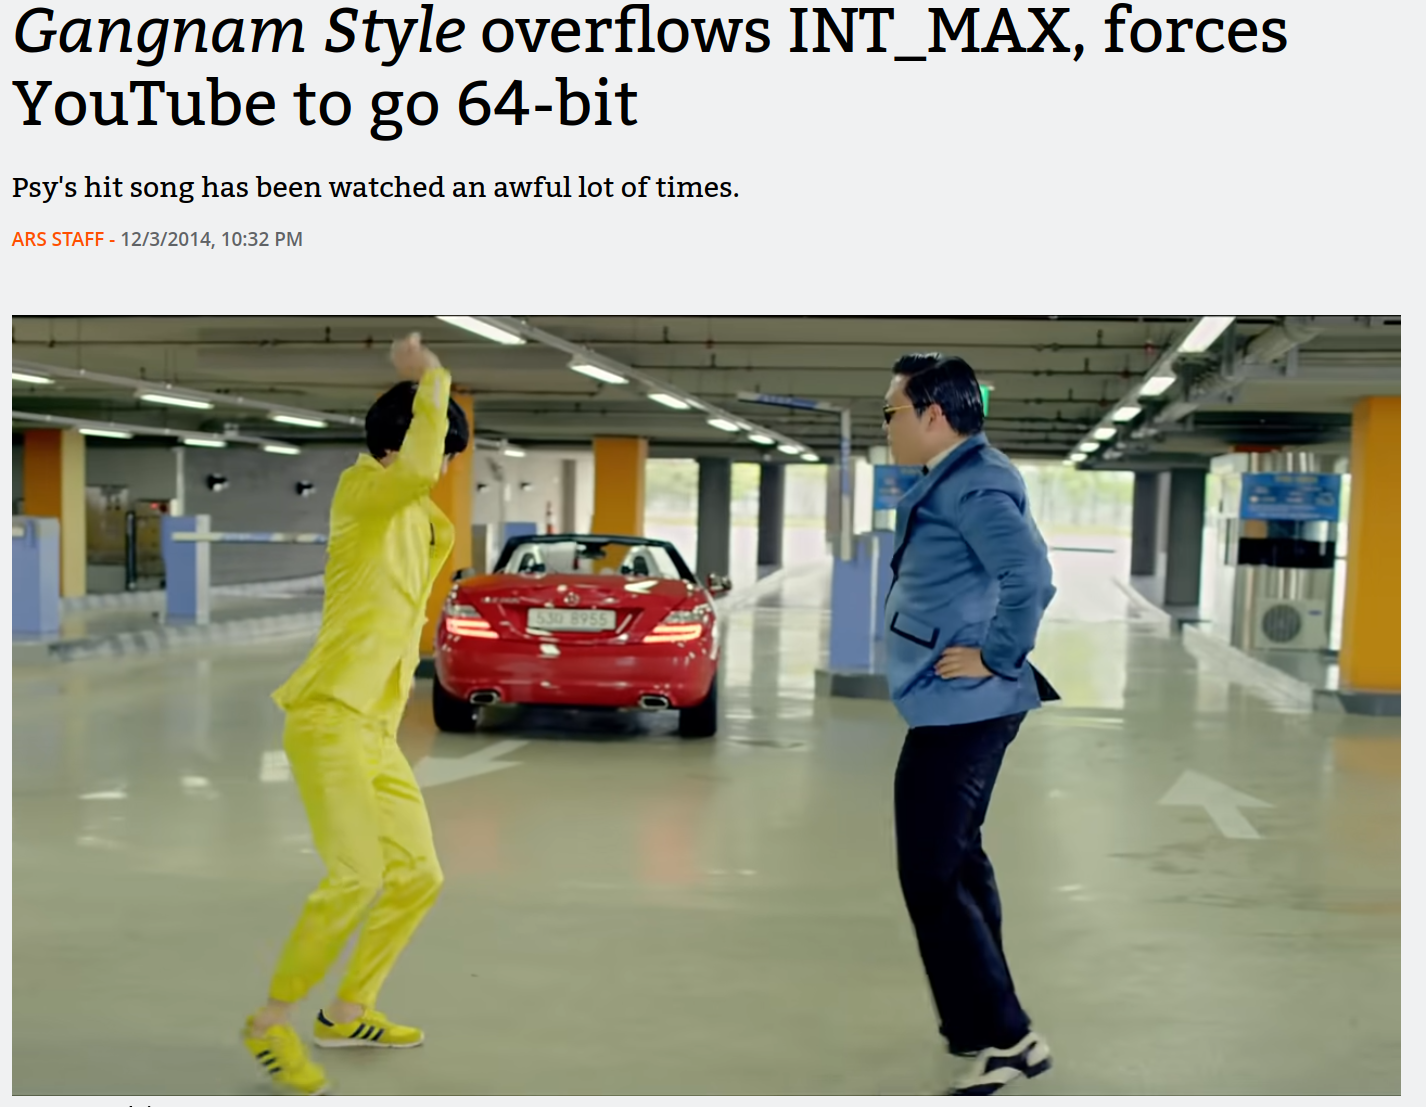

> **Extra**
>
> [More on integer overflow on
> YouTube](https://arstechnica.com/information-technology/2014/12/gangnam-style-overflows-int_max-forces-youtube-to-go-64-bit/)

## Logical Vector

In [ ]:
log_vec <- c(FALSE, FALSE, TRUE)
log_vec

[1] FALSE FALSE  TRUE

. . .

In [ ]:
# While more concise, using T/F instead of TRUE/FALSE can be confusing
log_vec2 <- c(F, F, T)
log_vec2

[1] FALSE FALSE  TRUE

. . .

In [ ]:
typeof(log_vec)

[1] "logical"

. . .

In [ ]:
is.logical(log_vec)

[1] TRUE

## Type Coercion

-   All elements of a vector must be of the same type.
-   If you try to combine vectors of different types, their elements
    will be **coerced** to the most flexible type.

. . .

In [ ]:
# Note that logical vector get coerced to 0/1 for FALSE/TRUE
c(dbl_vec, log_vec)

[1] 300 200   4   0   0   1

. . .

In [ ]:
c(char_vec, int_vec)

[1] "apple"      "banana"     "watermelon" "300"        "200"       
[6] "4"         

. . .

In [ ]:
# If no natural way of type conversion exists, NAs are introduced
as.numeric(char_vec)

[1] NA NA NA

## Implicit Type Coercion

<figure>
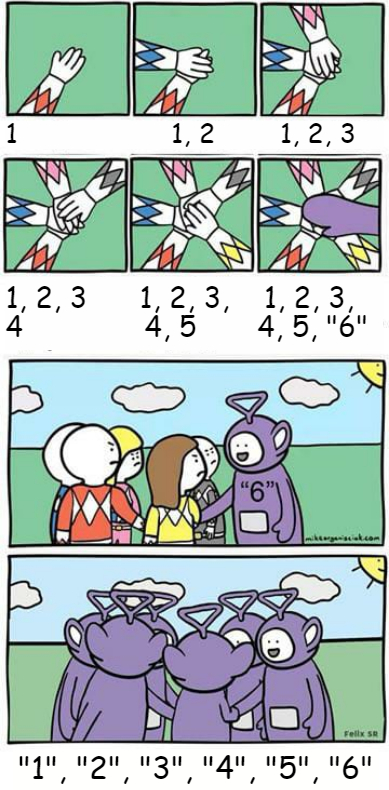
<figcaption aria-hidden="true"><a
href="https://twitter.com/data_question/status/1504842568013471744">Twitter
(X)</a></figcaption>
</figure>

## NA and NULL

-   R makes a distinction between:
    -   `NA` - value exists, but is unknown (e.g. survey non-response)
    -   `NULL` - object does not exist
-   `NA`’s are used in data sets (missing data).
-   `NULL`’s are used in function calls (optional arguments).

. . .

In [ ]:
NA

[1] NA

. . .

In [ ]:
NULL

NULL

. . .

> **Extra**
>
> [R Documentation on
> NA](https://stat.ethz.ch/R-manual/R-devel/library/base/html/NA.html)

## NA and NULL: Example

In [ ]:
na <- c(NA, NA, NA)
na

[1] NA NA NA

. . .

In [ ]:
length(na)

[1] 3

. . .

In [ ]:
null <- c(NULL, NULL, NULL)
null

NULL

. . .

In [ ]:
length(null)

[1] 0

## Working with NAs

In [ ]:
# Presence of NAs can lead to unexpected results
v_na <- c(1, 2, 3, NA, 5)
mean(v_na)

[1] NA

. . .

In [ ]:
# NAs should be treated specially
mean(v_na, na.rm = TRUE)

[1] 2.75

. . .

In [ ]:
# Remember NAs are missing values
# Thus result of comparing them is unknown
NA == NA

[1] NA

. . .

In [ ]:
# is.na() is a special function that checks whether value is missing (NA)
is.na(v_na)

[1] FALSE FALSE FALSE  TRUE FALSE

. . .

In [ ]:
# We can use such logical vectors for subsetting (more below)
v_na[!is.na(v_na)]

[1] 1 2 3 5

# Subsetting

## Vector Indexing and Subsetting

-   Indexing in R starts from **1**.
-   To subset a vector, use `[]` to index the elements you would like to
    select.
-   If you would like to select only a single element you can also use
    `[[]]`.

. . .

    vector[index]

    vector[[index]]

. . .

In [ ]:
dbl_vec[[1]]

[1] 300

. . .

In [ ]:
dbl_vec[c(1,3)]

[1] 300   4

## Summary of Vector Subsetting

| Value | Example | Description |
|:-------------|:--------------|:-------------------------------------------|
| Positive integers | `v[c(3, 1)]` | Returns elements at specified positions |
| Negative integers | `v[-c(3, 1)]` | Omits elements at specified positions |
| Logical vectors | `v[c(FALSE, TRUE)]` | Returns elements where corresponding logical value is `TRUE` |
| Character vector | `v[c(“c”, “a”)]` | Returns elements with matching names (only for named vectors) |
| Nothing | `v[]` | Returns the original vector |
| 0 (Zero) | `v[0]` | Returns a zero-length vector |

## Generating Sequences

-   You can use `:` operator to generate vectors of indices for
    subsetting.
-   `seq()` function provides a generalisation of `:` for generating
    arithemtic progressions.

. . .

In [ ]:
2:4

[1] 2 3 4

. . .

In [ ]:
seq(from = 1, to = 4, by = 2)

[1] 1 3

## Vector Subsetting: Examples

In [ ]:
v

[1] 1 2 3 4

. . .

In [ ]:
v[2:4]

[1] 2 3 4

. . .

In [ ]:
# Argument names can be omitted for matching by position
v[seq(1,4,2)]

[1] 1 3

. . .

In [ ]:
# All but the last element
v[-length(v)]

[1] 1 2 3

. . .

In [ ]:
# Reverse order
v[seq(length(v), 1, -1)]

[1] 4 3 2 1

## Vector Recycling

For operations that require vectors to be of the same length R recycles
(reuses) the shorter one.

. . .

In [ ]:
c(0, 1) + c(1, 2, 3, 4)

[1] 1 3 3 5

. . .

In [ ]:
5 * c(1, 2, 3, 4)

[1]  5 10 15 20

. . .

In [ ]:
c(1, 2, 3, 4)[c(TRUE, FALSE)]

[1] 1 3

## `which()` function

Returns indices of TRUE elements in a vector.

. . .

In [ ]:
char_vec

[1] "apple"      "banana"     "watermelon"

. . .

In [ ]:
char_vec == "watermelon"

[1] FALSE FALSE  TRUE

. . .

In [ ]:
which(char_vec == "watermelon")

[1] 3

. . .

In [ ]:
dbl_vec[char_vec == "watermelon"]

[1] 4

. . .

In [ ]:
dbl_vec[which(char_vec == "watermelon")]

[1] 4

## Membership Operation

Operator `%in%` returns `TRUE` if an object on the left side is present
in a sequence on the right.

In [ ]:
"a" %in% "abc" # Note that R strings are not sequences

[1] FALSE

. . .

In [ ]:
3 %in% c(1, 2, 3) # c(1, 2, 3) is a vector

[1] TRUE

. . .

In [ ]:
!(3 %in% c(1, 2, 3))

[1] FALSE

# Lists

## Lists

-   As opposed to vectors, **lists** can contain elements of any type.
-   List can also have nested lists within it.
-   Outputs of most statistical models are lists.
-   Lists are constructed using `list()` function in R.

. . .

In [ ]:
# We can combine different data types in a list and, optionally, name elements.
l <- list(
  "linear regression",
  model = "y ~ x",
  coefs = c(1.2, 0.5),
  list(
    x = 1:10,
    y = 1.2 + 1:10 * 0.5
  )
)
l

[[1]]
[1] "linear regression"

$model
[1] "y ~ x"

$coefs
[1] 1.2 0.5

[[4]]
[[4]]$x
 [1]  1  2  3  4  5  6  7  8  9 10

[[4]]$y
 [1] 1.7 2.2 2.7 3.2 3.7 4.2 4.7 5.2 5.7 6.2

## R Object Structure

-   `str()` - one of the most useful functions in R.
-   It shows the **str**ucture of an arbitrary R object.

. . .

In [ ]:
str(l)

List of 4
 $      : chr "linear regression"
 $ model: chr "y ~ x"
 $ coefs: num [1:2] 1.2 0.5
 $      :List of 2
  ..$ x: int [1:10] 1 2 3 4 5 6 7 8 9 10
  ..$ y: num [1:10] 1.7 2.2 2.7 3.2 3.7 4.2 4.7 5.2 5.7 6.2

## List Subsetting

-   As with vectors you can use `[]` to subset lists.
-   This will return a list of length one.
-   Components of the list can be individually extracted using `[[` and
    `$` operators.

. . .

    list[index]

    list[[index]]

    list$name

. . .

In [ ]:
l[3]

$coefs
[1] 1.2 0.5

. . .

In [ ]:
str(l[3])

List of 1
 $ coefs: num [1:2] 1.2 0.5

. . .

In [ ]:
l[[3]]

[1] 1.2 0.5

. . .

In [ ]:
# Only works with named elements
l$coefs

[1] 1.2 0.5

# Attributes

## Attributes

-   All R objects can have attributes associated with them.
-   Attributes contain metadata that can be attached to any R object.
-   Technically, attributes can be thought of as named lists.
-   Names, dimensions and class are common examples of attributes.
-   They (and some other) have special functions for getting and setting
    them.

## Attributes: Examples

In [ ]:
v <- c(1, 2, 3, 4)

. . .

In [ ]:
# Setting attributes as a named list
attributes(v) <- list(some_info = "This is a vector")

. . .

In [ ]:
attributes(v)

$some_info
[1] "This is a vector"

. . .

In [ ]:
# Setting individual attributes
attr(v, "more_info") <- "This vector contains numbers"

. . .

In [ ]:
attr(v, "more_info")

[1] "This vector contains numbers"

. . .

In [ ]:
attributes(v)

$some_info
[1] "This is a vector"

$more_info
[1] "This vector contains numbers"

. . .

In [ ]:
# To set names for vector elements we can use names() function
names(v) <- c("a", "b", "c", "d")
v

a b c d 
1 2 3 4 
attr(,"some_info")
[1] "This is a vector"
attr(,"more_info")
[1] "This vector contains numbers"

## Factors

-   Factors form the basis of categorical data analysis in R
-   Values of nominal variables represent categories rather than numeric
    data
-   Examples are abundant in social sciences (gender, party, region,
    etc.)
-   Internally, in R factor variables are represented by integer vectors
-   With 2 additional attributes:
    -   `class()` attribute which is set to `factor`
    -   `levels()` attribute which defines allowed values

## Factors: Example

In [ ]:
gender <- c("male", "female", "female", "non-binary", "male")
gender

[1] "male"       "female"     "female"     "non-binary" "male"      

. . .

In [ ]:
typeof(gender)

[1] "character"

. . .

In [ ]:
# We use factor() function to convert character vector into factor
# Only unique elements of character vector are considered as a level
gender <- factor(gender)
gender

[1] male       female     female     non-binary male      
Levels: female male non-binary

. . .

In [ ]:
class(gender)

[1] "factor"

. . .

In [ ]:
# Note that the data type of this vector is integer (and not character)
typeof(gender)

[1] "integer"

## Factors: Example Continued

In [ ]:
# Note that R automatically sorted the categories alphabetically
levels(gender)

[1] "female"     "male"       "non-binary"

. . .

In [ ]:
# You can change the reference category using relevel() function
gender <- relevel(gender, ref = "male")
levels(gender)

[1] "male"       "female"     "non-binary"

. . .

In [ ]:
# Or define an arbitrary ordering of levels
# using 'levels' argument in factor() function
gender <- factor(gender, levels = c("non-binary", "male", "female"))
levels(gender)

[1] "non-binary" "male"       "female"    

. . .

In [ ]:
# Under the hood factors continue to be integer vectors
as.integer(gender)

[1] 2 3 3 1 2

## Tabulation

-   `table()` function is very useful for describing discrete data.
-   It can be used for:
    -   tabulating a single variable
    -   creating contingency tables (crosstabs).
-   Implicitly, R treats tabulated variables as factors.

. . .

In [ ]:
var_1 <- sample(c("female", "male", "non-binary"), size = 50, replace = TRUE)
var_2 <- sample(c(-1, 0, 1), size = 50, replace = TRUE)

. . .

In [ ]:
table(var_1, var_2)

            var_2
var_1        -1 0 1
  female      7 6 5
  male        6 7 7
  non-binary  5 4 3

## Factors in Crosstabs

In [ ]:
var_2 <- factor(
  var_2, 
  levels = c(0, -1, 1)
)

. . .

In [ ]:
table(var_2)

var_2
 0 -1  1 
17 18 15 

. . .

In [ ]:
var_2 <- factor(
  var_2, 
  levels = c(0, -1, 1), 
  labels = c("centre", "left", "right")
)

. . .

In [ ]:
table(var_1, var_2)

            var_2
var_1        centre left right
  female          6    7     5
  male            7    6     7
  non-binary      4    5     3

# Arrays

## Arrays and Matrices

-   Arrays are vectors with an added class and dimensionality attribute
-   These attributes can be accessed using `class()` and `dim()`
    functions
-   Arrays can have an arbitrary number of dimensions
-   Matrices are special cases of arrays that have just two dimensions
-   Arrays and matrices can be created using `array()` and `matrix()`
    functions
-   Or by adding dimension attribute with `dim()` function

## Array: Example

In [ ]:
# : operator can be used generate vectors of sequential numbers
a <- 1:12
a

 [1]  1  2  3  4  5  6  7  8  9 10 11 12

. . .

In [ ]:
class(a)

[1] "integer"

. . .

In [ ]:
dim(a) <- c(3, 2, 2)
a

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

. . .

In [ ]:
class(a)

[1] "array"

## Matrix: Example

In [ ]:
m <- 1:12

. . .

In [ ]:
dim(m) <- c(3, 4)
m

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

. . .

In [ ]:
# Alternatively, we could use matrix() function
m <- matrix(1:12, nrow = 3, ncol = 4)
m

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

. . .

In [ ]:
# Note that length() function displays the length of underlying vector
length(m)

[1] 12

## Array and Matrix Subsetting

-   Subsetting higher-dimensional (\> 1) structures is a generalisation
    of vector subsetting
-   But, since they are built upon vectors there is a nuance (albeit
    uncommon)
-   They are usually subset in 2 ways:
    -   with multiple vectors, where each vector is a sequence of
        elements in that dimension
    -   with 1 vector, in which case subsetting happens from the
        underlying vector

<!-- -->

    array[vector_1, vector_2, ..., vector_n]

    array[vector]

## Array Subsetting: Example

In [ ]:
a

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

. . .

In [ ]:
# Most common way
a[1, 2, 2]

[1] 10

. . .

In [ ]:
# Specifying drop = FALSE after indices retains the original dimensionality of matrix/array
a[1, 2, 2, drop = FALSE]

, , 1

     [,1]
[1,]   10

. . .

In [ ]:
# Here elements are subset from underlying vector (with repetition)
a[c(1, 2, 2)]

[1] 1 2 2

## Matrix Subsetting: Example

In [ ]:
m

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

. . .

In [ ]:
# As with arrays drop = FALSE prevents from this object being collapsed into 1-dimensional vector
m[, 1, drop = FALSE]

     [,1]
[1,]    1
[2,]    2
[3,]    3

. . .

In [ ]:
# Subset all rows, first two columns
m[1:nrow(m), 1:2]

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

. . .

In [ ]:
# Note that vector recycling also applies here
m[c(TRUE, FALSE), -3]

     [,1] [,2] [,3]
[1,]    1    4   10
[2,]    3    6   12

## R packages

-   R’s flexibility comes from its rich package ecosystem
-   [Comprehensive R Archive Network
    (CRAN)](https://cran.r-project.org/) is the official repository of R
    packages
-   At the moment it contains ~20K external packages
-   Use `install.packages(<package_name>)` function to install packages
    that were released on CRAN
-   Check `devtools` package if you need to install a package from other
    sources (e.g. GitHub, Bitbucket, etc.)
-   Type `library(<package_name>)` to load installed packages

## Help!

R has an inbuilt help facility which provides more information about any
function:

In [ ]:
?length

. . .

In [ ]:
help(dim)

. . .

-   The quality of documentation varies a lot across packages.
-   Stackoverflow is a good resource for many standard tasks.
-   For custom packages it is often helpful to check the issues page on
    the GitHub.
-   E.g. for `ggplot2`: <https://github.com/tidyverse/ggplot2/issues>
-   Or, indeed, any search engine [#LMDDGTFY](https://lmddgtfy.net/)

## Next

-   Tutorial: R objects, attributes and subsetting
-   Next week: Control Flow in R